-2.4999991040000658


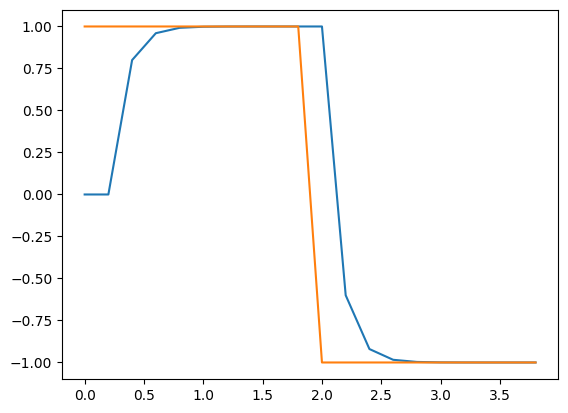

In [31]:
import random
import pandas as pd
import matplotlib.pyplot as plt

class Robot:
    
    def __init__(self):
        self.theta = 0
        self.vtheta = 0
    
    def simulate(self, steptime):
        self.theta += self.vtheta * steptime

class Controller:
    
    def __init__(self, targettheta):
        self.targettheta = targettheta
        self.lasttime = 0
        self.lasterror = 0
        self.kp = 4
        self.kd = 0.0
        self.ki = 0.0
        self.integral = 0
        self.sumerror = 0
        
    def update(self, robot, time):
        dt = time - self.lasttime
        
        if dt > 0:
            error = self.targettheta - robot.theta # + (random.random() * 0.1)
            derror = (error - self.lasterror) / dt

            self.integral += self.ki * error * dt
            
            derrivative = self.kd * derror
                
            robot.vtheta = error * self.kp + derrivative + self.integral
        
            self.lasttime = time
            self.lasterror = error
            self.sumerror += error
        
    
    
class Simulation:
    
    def __init__(self, controller):
        self.robot = Robot()
        self.time = 0
        self.data = []
        self.controller = controller
        
    def run(self, steps, steptime):
        for i in range(steps):
            self.robot.simulate(steptime)
            self.data.append([self.time, self.robot.theta, self.controller.targettheta])
            
            self.controller.update(self.robot, self.time)
            
            self.time += steptime

    def plot(self):
        print(self.controller.sumerror)
        df = pd.DataFrame(self.data, columns = ['Time', 'Value', 'Target value'])
        
        fig = plt.figure()
        plt.plot(df['Time'],df['Value'])
        plt.plot(df['Time'],df['Target value'])
        plt.show()
    
sim = Simulation(Controller(1))
sim.run(10, 0.2)
sim.controller = Controller(-1)
sim.run(10, 0.2)

sim.plot()